# **Project Name**    -



##### **Project Type**    - Unsupervised Machine Learning (Clustering and NLP_Sentiment Analysis)
##### **Contribution**    - Individual - Aiman Sahay

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [295]:
# Import Libraries

# Data Manipulation
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)
import datetime as dt

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import missingno as msno

# Sentiment Analysis and NLP
import re
# !pip install textblob
from textblob import TextBlob
# !pip install spacy
# !pip install typing_extensions==4.7.1 --upgrade
# !python -m spacy download en_core_web_sm
import spacy

# Date Preprocessing and Transformation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # This might not be needed
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import time
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Load Dataset

hotel_df = pd.read_csv("Zomato Restaurant names and Metadata.csv")
review_df = pd.read_csv("Zomato Restaurant reviews.csv")

### Dataset First View

In [3]:
# Dataset First Look
hotel_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

print(f"The Restaurant Data has {hotel_df.shape[0]} rows and {hotel_df.shape[1]} columns.")
print(f"\nThe Review Data has {review_df.shape[0]} rows and {review_df.shape[1]} columns.")

The Restaurant Data has 105 rows and 6 columns.

The Review Data has 10000 rows and 7 columns.


### Dataset Information

In [6]:
# Dataset Info

print("Restaurant Names and Meta Data:\n")
hotel_df.info()

print(f"\n{'*'*50}")

print("\nCustomer Reviews Data:\n")
review_df.info()

Restaurant Names and Meta Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB

**************************************************

Customer Reviews Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null 

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

duplicates_hotel = hotel_df.duplicated().sum()
print(f"Number of duplicate records in Restaurant Data: {duplicates_hotel}")

duplicates_review = review_df.duplicated().sum()
print(f"\nNumber of duplicate records in Review Data: {duplicates_review}")

Number of duplicate records in Restaurant Data: 0

Number of duplicate records in Review Data: 36


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

print(f"Missing Values in Restaurant Data:\n")
print(hotel_df.isnull().sum())

print(f"\n{'*'*40}\n")

print(f"Missing Values in Review Data:\n")
print(review_df.isnull().sum())

Missing Values in Restaurant Data:

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

****************************************

Missing Values in Review Data:

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


**Function to set x-axis, y-axis labels and title for multiple subplots**

In [9]:
# Function for setting x, y labels and titles for multiple subplots.

def plot_labels(xlabel, ylabel, title, axes_obj, axes_loc):
    '''
    This function is used to set x, y labels and titles to multiple subplots plotted as an axis object.
    
    Args:
        xlabel - str: X label text for the plot.
        ylabel - str: Y label text for the plot.
        title - str: Title for the plot.
        axes_obj: Name of the axes object
        axes_loc - int: Index location of the plot.
        
    Returns:
        xlabel, ylabel and title for the subplot.
    '''
    
    # Flatten the axes to access the subplot.
    axes = axes_obj.flatten()
    # Set labels and title
    axes[axes_loc].set_xlabel(xlabel, fontdict={'fontsize': 14})
    axes[axes_loc].set_ylabel(ylabel, fontdict={'fontsize': 14})
    axes[axes_loc].set_title(title, fontdict={'fontsize': 16,  'fontweight' :'bold'})

**Function to Visualize Missing Values in the Dataset (with plot_labels function)**

In [10]:
# Visualizing the missing values

def show_missing_values(df):
    '''
    This function displays a heatmap and bar chart of missing values in the dataset.
    Note: plot_labels() function should be run first.
    
    Args:
        df: A pandas dataframe object.
        
    Returns:
        Heat Map and Bar Plot of Missing Values. 
    '''
    
    # Set the figure
    fig, axes = plt.subplots(1, 2, figsize=(15,6))
   
    try:
         # Heatmap showing the distribution of null values in the entire dataset.
        sns.heatmap(df.isnull(), ax=axes[0])
        plot_labels("", "", "Heatmap of Missing Values in the Dataset", axes, 0)
        
        # Bar chart displaying the count of non null values.
        msno.bar(df)
        plot_labels("", "", "Bar Plot of Missing Values in the Dataset", axes, 1)
        
    except NameError:
        print("Error: Run 'plot_labels()' function first!")  


Restaurant Data



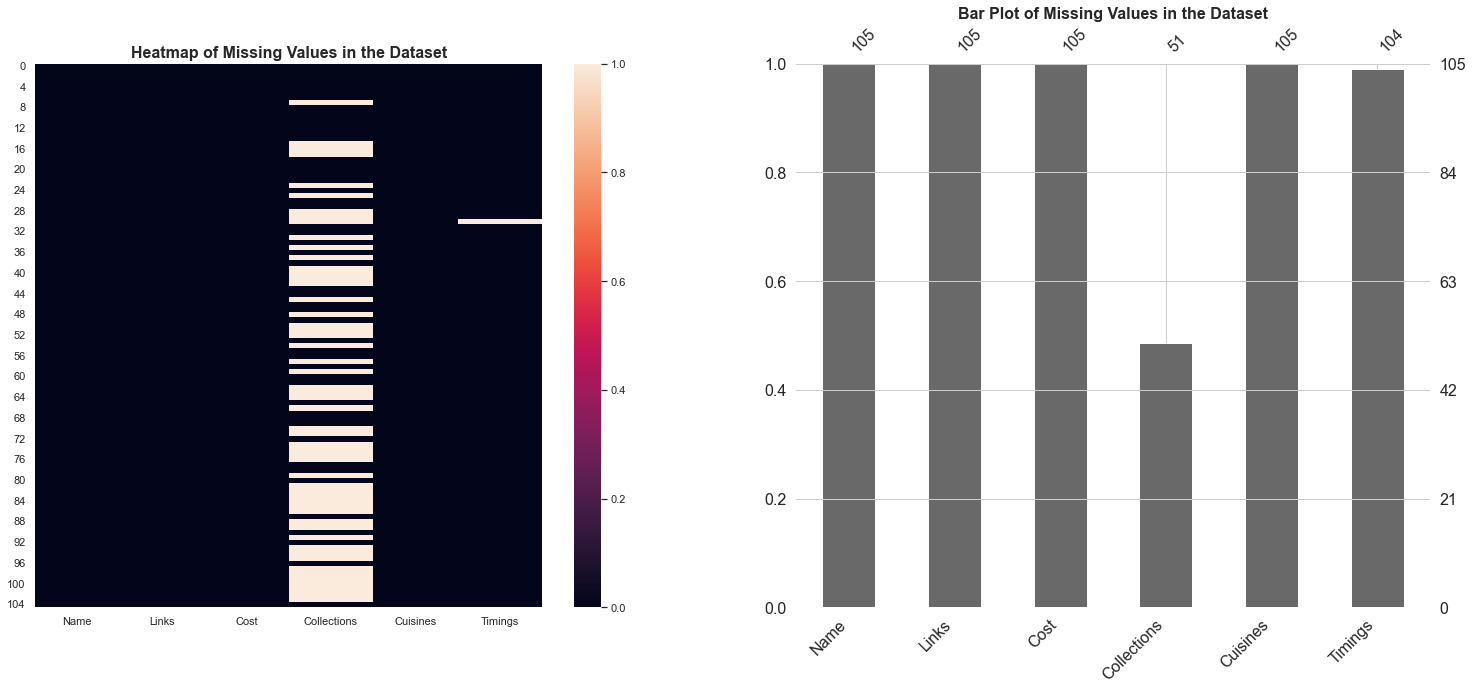

In [11]:
# Visualizing the missing values

print(f"Restaurant Data\n")
show_missing_values(hotel_df)


Review Data



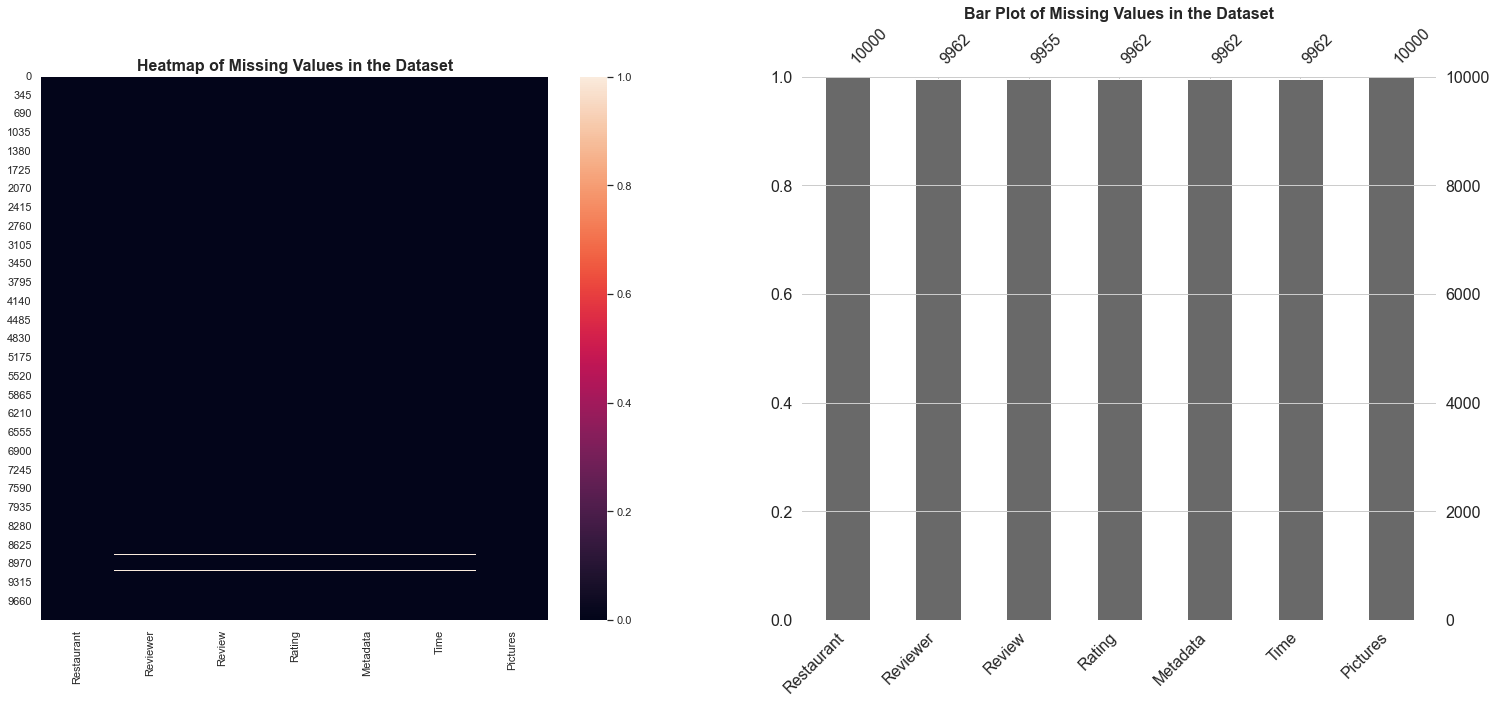

In [12]:
print(f"Review Data\n")
show_missing_values(review_df)

### What did you know about your dataset?

**Restaurant DataSet**
* There are a total of 105 observations and 6 features.
* Features "Collections" and "Timings" have missing values viz. 54 and 1 respectively.
* There is no duplicate records i.e., 105 unique observations.
* Feature "Cost" is an amount but has an "object" data type. This will have to converted later to "int" data type.

**Review DataSet**
* There are at total 10000 observations and 7 features.
* Features "Reviewer", "Rating", "Metadata", "Time" have 38 missing values each and "Review" has 45 missing values. 
* There are 36 duplicate records in the dataset. 
* "Rating" should be "int" data type as it represents ordinal data. Currently, it has an "object" data type.
* "Timing" represents the time when review was posted but has an "object" data type. This should be converted into "datetime" data type.


## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns

print("Restaurant Data Columns:\n")
print(hotel_df.columns.to_list())

print(f"\n{'*'*100}\n")

print("Review Data Columns:\n")
print(review_df.columns.to_list())

Restaurant Data Columns:

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

****************************************************************************************************

Review Data Columns:

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [14]:
# Dataset Describe

print("Restaurant Data Stats:\n")
hotel_df.describe(include="all").T


Restaurant Data Stats:



,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [15]:
print("Review Data Stats:\n")
review_df.describe(include="all").T

Review Data Stats:



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### Variables Description

**Restaurant Data**
* **Name:** Name of Restaurants.

* **Links:** URL Links of Restaurants.

* **Cost:** Per person estimated Cost of dining.

* **Collection:** Tagging of Restaurants w.r.t. Zomato categories.

* **Cuisines:** Cuisines served by Restaurants.

* **Timings:** Restaurant Timings.

**Review Data**
* **Restaurant:** Name of the Restaurant.

* **Reviewer:** Name of the Reviewer.

* **Review:** Review Text.

* **Rating:** Rating Provided by Reviewer.

* **MetaData:** Reviewer Metadata - No. of Reviews and Followers.

* **Time:** Date and Time of Review.

* **Pictures:** Number of pictures posted with review.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.

print("Restaurant Data\n\nNumber of unique values in:\n")
for i in hotel_df.columns.tolist():
    print(f'{i} : {hotel_df[i].nunique()}')
    
print(f"\n{'*'*50}\n")

print("Review Data\n\nNumber of unique values in:\n")
for i in review_df.columns.tolist():
    print(f'{i} : {review_df[i].nunique()}')

Restaurant Data

Number of unique values in:

Name : 105
Links : 105
Cost : 29
Collections : 42
Cuisines : 92
Timings : 77

**************************************************

Review Data

Number of unique values in:

Restaurant : 100
Reviewer : 7446
Review : 9364
Rating : 10
Metadata : 2477
Time : 9782
Pictures : 36


## 3. ***Data Wrangling***

In [17]:
# Create a copy of the original datasets

restaurant_data = hotel_df.copy()
review_data = review_df.copy()

### Data Wrangling on Restaurant Data

**1. Duplicate Values**

We noticed earlier that there are **No Duplicate Values** in the **Restaurant Data**.

**2. Null / Missing Values**

We noted earlier that there were a quite a few missing values in the Restaurant Dataset. Let's address those now.

In [18]:
def missing_values_percent(df, df_null_cols):
    
    '''
    This function calculates the percentage of missing values for the given columns in the dataset.
    
    Args:
        df: A Pandas DataFrame Object.
        df_null_cols - list: List of columns with null values.
        
    Returns:
        A dictionary with column name as "key" and tuple of null values count and null values percentage as "value".
    '''
   
    df_null_dict = {}

    for col in df_null_cols:
        df_null_dict[col] = (df[col].isnull().sum(), round(df[col].isnull().sum() / len(df), 2))
    
    return df_null_dict


In [19]:
restaurant_null_cols = ["Collections", "Timings"]
print("Missing Values Count and Percentage in Restaurant Data:")
missing_values_percent(restaurant_data, restaurant_null_cols)

Missing Values Count and Percentage in Restaurant Data:


{'Collections': (54, 0.51), 'Timings': (1, 0.01)}

**Observation:** The percentage of null values in "Collections" is 52% and in all the other columns is very almost 0%.  
**Action:** Drop "Collections" column from Restaurant Data as the missing values percentage is more than 50% and drop all the rows with missing values in all the other columns since percentage is miniscule.

In [20]:
# Drop missing values
restaurant_data = restaurant_data.drop("Collections", axis=1)
restaurant_data = restaurant_data.dropna()

In [21]:
# Check Missing Values/Null Values Count

print(f"Missing Values in Restaurant Data:\n")
print(restaurant_data.isnull().sum())


Missing Values in Restaurant Data:

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64


There are **No Null / Missing Values** in the **Restaurant Dataset** now.

**3. Other Transformations**

In the Restaurant Data, we notice that the most meaningful columns for our analysis could be Name, Cost, Cuisines. Let's clean and standardize this data so that it could later be merged into Review Dataset using Name as the primary key.

* **Cost:** Convert data type of "Cost" from object to int.
* **Cuisines:** Standardize the Cuisine names, convert to list and store it in a new column "Cuisine_List".

In [22]:
# Convert data type of "Cost" from object to int.
restaurant_data["Cost"] = restaurant_data["Cost"].apply(lambda x: x.replace(",", "")).astype(int)

In [23]:
# Standardize "Cuisines" data, convert to a list and store in a new column "Cuisine_List".
restaurant_data["Cuisine_List"] = restaurant_data["Cuisines"].apply(lambda x: x.lower().replace(" ", "").split(","))

In [24]:
# Include only the "Name", "Cost" and "Cuisine_list" in the updated Restaurant Data.
restaurant_df = restaurant_data[["Name", "Cost", "Cuisine_List"]]

**4. Cleaned Restaurant Data**

In [25]:
# Check the shape and first 5 rows of the Restaurant Dataset to be used for our analysis.

print(f"Shape of Cleaned Restaurant Data: {restaurant_df.shape}\n")

restaurant_df.head()

Shape of Cleaned Restaurant Data: (104, 3)



,Name,Cost,Cuisine_List
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,1300,"[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"[asian, continental, northindian, chinese, med..."


### Data Wrangling on Review Data

**1. Duplicate Values**

We noticed earlier that the **Review Data** has **36 duplicate observations**. Let's see what these duplicates are.

In [26]:
review_duplicates = review_data[review_data.duplicated()]
print("Duplicates in Review Data\n")
review_duplicates

Duplicates in Review Data



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


**Observation:** All the duplicate observations in "Review Data" have null values.  
**Action:** Since this data does not contain any significant information, we can go ahead and drop these observations.

In [27]:
# Drop duplicates from "Review Data"

review_data = review_data.drop(review_duplicates.index)

In [28]:
# Check for duplicate observations again.
print(f"Number of Duplicate Observations in Review Data: {review_data.duplicated().sum()}")

Number of Duplicate Observations in Review Data: 0


We now have **No Duplicate Observations** in the **Review Data**.

---

**2. Null / Missing Values**

We noted earlier that there were a quite a few missing values in the Review datasets. Let's address those now.

In [29]:
# Review Data

review_null_cols = ["Reviewer", "Review", "Rating", "Metadata", "Time"]
print("Missing Values Count and Percentage in Review Data:")
missing_values_percent(review_data, review_null_cols)

Missing Values Count and Percentage in Review Data:


{'Reviewer': (2, 0.0),
 'Review': (9, 0.0),
 'Rating': (2, 0.0),
 'Metadata': (2, 0.0),
 'Time': (2, 0.0)}

**Observation:** The percentage of null values in all the columns is very almost 0%.  
**Action:** Drop all the rows with missing values since percentage is miniscule.

In [30]:
# Drop missing values

review_data = review_data.dropna()

In [31]:
# Check Missing Values/Null Values Count

print(f"Missing Values in Review Data:\n")
print(review_data.isnull().sum())

Missing Values in Review Data:

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


We now have **No Null / Missing Values** in the **Review Dataset**.

---

**3. Other Transformations**

* **Rating:** Convert data type to int and replace non-numeric values with mean imputation.
* **Metadata:** Extract Reviews and Followers Count and store them in two separate columns.
* **Time:** Convert Time data type to datetime.

In [32]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [33]:
review_data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


**3A. Rating - Mean Imputation** 

In [34]:
review_data["Rating"].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [35]:
review_data[review_data["Rating"]=="Like"]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


**Observation:** The "Rating" column has 1 observation as "Like" and all the other values are numeric.  
**Action:** Convert "Rating" to numeric data type and "Like" to NaN. Then calculate mean rating for the restaurant "The Old Madras Baking Company" for which the rating is "Like" and impute the NaN value using this mean.

In [36]:
# Convert values other than numbers to NaN
review_data["Rating"] = pd.to_numeric(review_data["Rating"], errors="coerce")

# Calculate mean rating for "The Old Madras Baking Company" (TOMBC)
data_TOMBC = review_data[review_data["Restaurant"] == "The Old Madras Baking Company"]
mean_TOMBC = data_TOMBC["Rating"].mean()

# Mean Imputation
review_data["Rating"].fillna(mean_TOMBC, inplace=True)

# Check Unique Values and data type of "Rating" column.
print(f"Unique Rating Values: {review_data['Rating'].unique()}\n")
print(f"Data Type of Rating: {review_data['Rating'].dtype}")

Unique Rating Values: [5.         4.         1.         3.         2.         3.5
 4.5        2.5        1.5        3.61616162]

Data Type of Rating: float64


**3B. Metadata - Extracting Reviews and Followers Count.**

In [37]:
# Converting "Metadata" with reviews and followers count to a list.
metadata = review_data["Metadata"].apply(lambda x: x.split(" , ")).to_frame()

# Extracting Reviews Count and storing in a new column "Number_of_Reviews"
review_data["Number_of_Reviews"] = metadata["Metadata"].apply(lambda x: x[0][0]).astype(int)

# Extracting Followers Count and storing in a new column "Number_of_Followers"
review_data["Number_of_Followers"] = metadata["Metadata"].apply(lambda x: x[1][0] if len(x) > 1 else 0).astype(int)

# View the two new columns created
review_data[["Number_of_Reviews", "Number_of_Followers"]]

,Number_of_Reviews,Number_of_Followers
0,1,2
1,3,2
2,2,3
3,1,1
4,3,2
...,...,...
9995,5,5
9996,2,5
9997,6,4
9998,1,1


**3C. Time - Convert data type to datetime**

In [38]:
review_data["Time"] = pd.to_datetime(review_data["Time"])

# Data Type of "Time"
review_data["Time"].dtype

dtype('<M8[ns]')

**3D. Cleaned Review Data**

* Use the newly created columns viz. "Number_of_Reviews" and "Number_of_Followers" and remove the earlier Metadata column.

In [39]:
# Drop "Metadata" column
review_df = review_data.drop(["Metadata"], axis=1)

# Print shape of the Cleaned Review Data and first 5 rows.
print(f"Shape of Cleaned Review Data: {review_df.shape}\n")

review_df.head()

Shape of Cleaned Review Data: (9955, 8)



,Restaurant,Reviewer,Review,Rating,Time,Pictures,Number_of_Reviews,Number_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2


In [40]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Restaurant           9955 non-null   object        
 1   Reviewer             9955 non-null   object        
 2   Review               9955 non-null   object        
 3   Rating               9955 non-null   float64       
 4   Time                 9955 non-null   datetime64[ns]
 5   Pictures             9955 non-null   int64         
 6   Number_of_Reviews    9955 non-null   int32         
 7   Number_of_Followers  9955 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 622.2+ KB


## Merge the Datasets

In [41]:
merged_df = pd.merge(review_df, restaurant_df, left_on="Restaurant", right_on="Name")

# Shape of the Merged Dataset
print(f"Shape of the Merged Data: {merged_df.shape}\n")

# Display the first 5 rows.
merged_df.head()

Shape of the Merged Data: (9855, 11)



,Restaurant,Reviewer,Review,Rating,Time,Pictures,Number_of_Reviews,Number_of_Followers,Name,Cost,Cuisine_List
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."


### What all manipulations have you done and insights you found?

The following table summarizes the manipulations done to the original datasets:

<div style="text-align: center; font-size: 15px; font-weight: bold;">Data Manipulation</div>

| Dataset | Original Dataset Feature | Processed Dataset Feature | Reason (Insights) |
|:-----: | :-----: |  :-----: | :-----: |
| Restaurant | Collections | NA | Dropped the column as missing values were > 50%. |
| Restaurant | Timings | Timings | There was 1 missing value hence dropped that row. |
| Restaurant | Cost | Cost | Converted data type from object to int. |
| Restaurant | Cuisines | Cuisine_List | Created a new feature "Cuisine_List" to store all the standardized cusine names in a list. |
| Review | All | All | Identified and Removed 36 duplicate records which had all null values against restaurant names. |
| Review | Reviewer, Review, Rating, Metadata, Time | Reviewer, Review, Rating, Metadata, Time | Dropped all rows with missing values since their percentage was miniscule. |
| Review | Rating | Rating | Converted data type from object to numeric with mean imputation for non-numeric values. |
| Review | Metadata | Number_of_Reviews, Number_of_Followers | Extracted Reviews and Followers Count and stored them in two separate columns, changed their data type to int and dropped Metadata column. |
| Review | Time | Time | Converted data type from object to datetime. |

* **Cleaned Restaurant Data:** Filtered the dataset to select only 3 features to be used for analysis viz. Name, Cost, Cuisine_List.
* **Cleaned Review Data:** Consists of all the features including the newly created ones except Metadata.
* **Merged Data:** Merged the Cleaned Restaurant Data and Cleaned Review Data into a new dataframe. This new dataframe with a shape of 9855 rows and 11 features will be used for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [42]:
# Chart - 1 visualization code

**Function to plot multiple subplots of type - QQplot, PieChart, BoxPlot, ViolinPlot, Histogram, BarPlot, CountPlot, ScatterPlot**

In [43]:
def multiple_subplots(subplot_list, n_row, n_col, figsize, suptitle, plot_type, df, common_y_variable=None,\
                      target=False, target_var=None, estimator="mean", suptitle_fontsize=16):
    '''
    This function creates multiple subplots of QQPlot, PieChart, BoxPlot, ViolinPlot, Histogram, BarPlot, CountPlot, ScatterPlot.
    
    Args:
        subplot_list - list : This is a list of all the dataframe variables for which data is to be plotted.
        n_row - int : Number of rows for the subplots.
        n_col - int : Number of columns for the subplots.
        figsize - tuple of int : Tuple mentioning the dimension of the plotting area.
        suptitle - str : Main title or heading of the plot.
        plot_type - str : Type of plot, select from ["qqplot", "pie", "boxplot", "violinplot", "histplot", "barplot", "countplot", "scatterplot"].
        df - Pandas DataFrame Object : A Pandas DataFrame.
        common_y_variable - str: Optional: The common y-variable for plotting bar plots, default=None.
        target - bool: Optional: Boolean value if visualization is required target wise, default=False.
        target_var - str: Optional: The target variable if target is set to "True", default=None.
        estimator - str: Optional: The bar plot estimator, select from "mean" or "sum", defalut="mean".
        suptitle_fontsize - int : Fontsize of the main title, default value = 16
        
    Returns:
        Plotted Graphical Plots in n_row and n_col in an area of the figsize.
    '''
    
    # Define list of plots
    plots = ["qqplot", "pie", "boxplot", "violinplot", "histplot", "barplot", "countplot", "scatterplot"]
    
    # List of columns/variables to be plotted.
    lst = subplot_list
    
    # Create subplots with a n_row x n_col layout
    fig, axes = plt.subplots(n_row, n_col, figsize=figsize)
    fig.suptitle(suptitle, fontsize=suptitle_fontsize, fontweight="bold")
    
    # Flatten the axes array to iterate over subplots
    axes = axes.flatten()
    
    # Delete the extra subplot
    if (n_row*n_col) > len(lst):
        n_ax_to_remove = (n_row*n_col) - len(lst)
        for i in range(1, n_ax_to_remove+1):
            fig.delaxes(axes[-i])
        
    # Plot the data
    
    # Raise a NameError if plot_type is not from the available plot_types.
    if plot_type not in plots:
        raise NameError('Plot not available! Please select from \
        ["qqplot", "pie", "boxplot", "violinplot", "histplot", "barplot", "countplot", "scatterplot"]')
    
    # Code to plot the different plots.
    try:    
        for i in range(len(lst)):
            if plot_type == "qqplot":
                sm.qqplot(df.loc[:, lst[i]], line='45', ax=axes[i])
            elif plot_type == "pie":
                colors = sns.color_palette('pastel')
                counts = df[lst[i]].value_counts()
                axes[i].pie(counts, labels=counts.index, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
            elif plot_type == "boxplot":
                sns.boxplot(x=target_var if target else None, y=lst[i], data=df, ax=axes[i])
            elif plot_type == "violinplot":
                sns.violinplot(x=target_var if target else None, y=lst[i], data=df, ax=axes[i])
            elif plot_type == "histplot":
                sns.histplot(x=lst[i], data=df, hue=target_var if target else None, ax=axes[i], kde=True)
            elif plot_type == "scatterplot":
                sns.scatterplot(x=lst[i], y=common_y_variable, data=df, hue=target_var if target else None, ax=axes[i], alpha=0.5)
            elif plot_type == "countplot":
                order = df.groupby(lst[i])[common_y_variable].count().sort_values(ascending=False).index
                sns.countplot(x=lst[i], data=df, hue=target_var if target else None, ax=axes[i], order=order)
            elif plot_type == "barplot":
                if estimator == "mean":
                    order = df.groupby(lst[i])[common_y_variable].mean().sort_values(ascending=False).index
                    sns.barplot(x=lst[i], y=common_y_variable, hue=target_var if target else None, data=df, ax=axes[i], estimator=np.mean, order=order)
                elif estimator == "sum":
                    order = df.groupby(lst[i])[common_y_variable].sum().sort_values(ascending=False).index
                    sns.barplot(x=lst[i], y=common_y_variable, hue=target_var if target else None, data=df, ax=axes[i], estimator=sum, order=order)

            axes[i].set_title(f"{lst[i]}", fontdict={'fontsize':15, 'fontweight':'bold'})
            axes[i].set_xlabel("")
            axes[i].set_ylabel("")
            
    except NameError as e:
        # Catch the error and print the error message.
        print(f"An error occured: {e}")
        
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

**Function to plot multiple figure level plots of type - CountPlot, BarPlot, ScatterPlot**

In [44]:
def show_fig_plot(df, x_feature, figsize, col, plot_type, aspect, col_wrap, suptitle, title_plot_adjust, between_plot_adjust=None, \
                       hue=None, order=None, y_feature=None, height=6):
    '''
    This function shows a countplot, barplot, scatterplot for multiple variables simultaneously.
    
    Args:
        df - Pandas DataFrame Object: A Pandas Dataframe.
        x_feature - str: The feature to be plotted on the x-axis.
        figsize - tuple of int: Tuple containing the dimension of the plotting area.
        col - str: The feature whose categories are to be plotted column wise.
        plot_type - str: Select from ["count", "bar", "scatter"]
        aspect - float: The aspect ratio.
        col_wrap - int: Number of columns to be plotted on each row.
        suptitle - str: The main title for whole plot.
        title_plot_adjust - float: Space adjustment value between suptitle and plot.
        between_plot_adjust - float (Optional): Space adjustment value between two plots, default=None
        hue - str (Optional): Additional feature to analyze in each plot, default=None
        order (Optional): order of bars, default=None
        y_feature - str (Optional): y-axis feature in case of barplot, scatterplot, default=None
        height - int (Optional): Height of plots, default=6
        
    Returns:
        Multi-dimensional Count Plot.
    '''
    
    # Define list of plots
    plots = ["count", "bar", "scatter"]
    
    # Set the figure
    plt.figure(figsize=figsize)
    
    # Plot the chart
    
    # Raise a NameError if plot_type is not from the available plot_types.
    if plot_type not in plots:
        raise NameError('Plot not available! Please select from ["bar", "count", "scatter"]')
    
    # Code to plot the different plots.
    try:
        if plot_type == "count":
            sns.catplot(x=x_feature, data=df, kind="count", hue=hue, col=col, height=height, aspect=aspect, \
                        col_wrap=col_wrap, order=order)
        elif plot_type == "bar":
            sns.catplot(x=x_feature, y=y_feature, data=df, kind="bar", hue=hue, col=col, height=height, aspect=aspect, \
                        col_wrap=col_wrap, order=order)
        elif plot_type == "scatter":
            sns.relplot(x=x_feature, y=y_feature, data=df, kind="scatter", hue=hue, col=col, height=height, aspect=aspect, \
                      col_wrap=col_wrap)
            
    except NameError as e:
        # Catch the error and print the error message.
        print(f"An error occurred: {e}")
    
    # Set title and adjustments
    plt.suptitle(suptitle, fontsize=18, fontweight="bold")
    plt.subplots_adjust(top=title_plot_adjust)
    plt.subplots_adjust(hspace=between_plot_adjust)
    
    # Show the plot
    plt.show()

Let's identify the best restaurants in terms of Rating. To do this, we'll set a threshold of 4.5 meaning that restaurants with an average rating of >= 4.5 will be considered as highest rated restaurants.

The dataset contains 99 unique restaurants. To make sense of restaurants in terms of rating, let's group the restaurants into 3 categories as follows:
> * Highest_Rated with Rating $\geq$ 4.0
> * Moderate_Rated with Rating $\geq$ 3.5 and $<$ 4.0
> * Low_Rated with Rating $<$ 3.5

In [45]:
# Calculate average rating for each restaurant
restaurant_mean_ratings = merged_df.groupby("Restaurant")["Rating"].mean()

# Define a function to assign rating category
def assign_rating_category(avg_rating):
    if avg_rating >= 4.0:
        return "High_Rated"
    elif avg_rating >= 3.5:
        return "Moderate_Rated"
    else:
        return "Low_Rated"

# Create a new column "Rating_Category" based on the average rating
merged_df['Rating_Category'] = merged_df["Restaurant"].map(restaurant_mean_ratings).apply(assign_rating_category)

# Print the updated DataFrame
merged_df[["Restaurant", "Rating", "Rating_Category"]]

,Restaurant,Rating,Rating_Category
0,Beyond Flavours,5.0,High_Rated
1,Beyond Flavours,5.0,High_Rated
2,Beyond Flavours,5.0,High_Rated
3,Beyond Flavours,5.0,High_Rated
4,Beyond Flavours,5.0,High_Rated
...,...,...,...
9850,Chinese Pavilion,3.0,Moderate_Rated
9851,Chinese Pavilion,4.5,Moderate_Rated
9852,Chinese Pavilion,1.5,Moderate_Rated
9853,Chinese Pavilion,4.0,Moderate_Rated


In [46]:
merged_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'Number_of_Reviews', 'Number_of_Followers', 'Name', 'Cost',
       'Cuisine_List', 'Rating_Category'],
      dtype='object')

In [47]:
restaurant_mean_ratings.sort_values(ascending=False)

Restaurant
AB's - Absolute Barbecues         4.880
B-Dubs                            4.810
3B's - Buddies, Bar & Barbecue    4.760
Paradise                          4.700
Flechazo                          4.660
                                  ...  
Behrouz Biryani                   2.825
Mathura Vilas                     2.820
Pakwaan Grand                     2.710
Asian Meal Box                    2.580
Hotel Zara Hi-Fi                  2.400
Name: Rating, Length: 99, dtype: float64

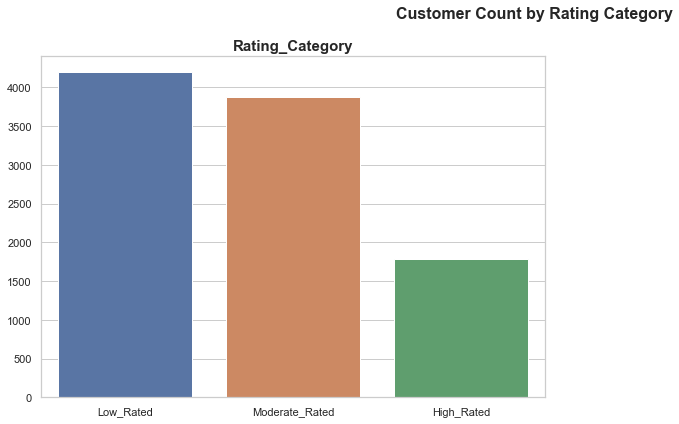

In [48]:
multiple_subplots(["Rating_Category"], 1, 2, (15,6), "Customer Count by Rating Category", "countplot", merged_df, "Restaurant")

Observation: Total number of customers visiting "Low_Rated" restaurants is highest and those visiting "High_Rated" is lowest.

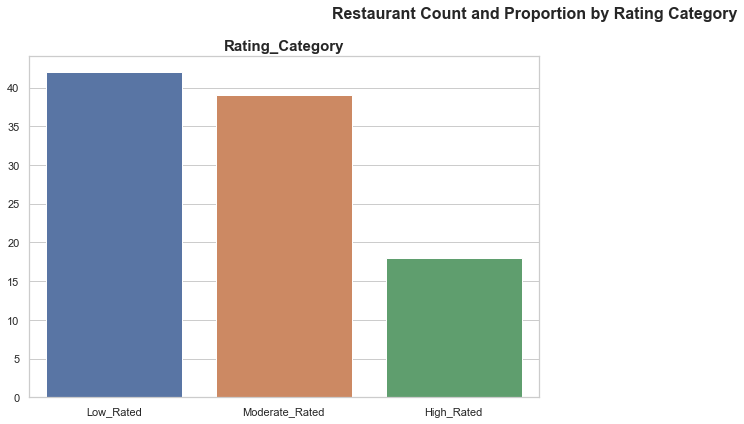

([<matplotlib.patches.Wedge at 0x23ffbec7af0>,
 [Text(-0.5947049149539251, 0.9253788759906101, 'High_Rated'),
  Text(-0.6799748210598089, -0.8646584543764555, 'Low_Rated'),
  Text(1.0395008464867046, 0.3597749159591658, 'Moderate_Rated')],
 [Text(-0.3243844990657773, 0.5047521141766963, '18.2%'),
  Text(-0.37089535694171394, -0.4716318842053393, '42.4%'),
  Text(0.5670004617200206, 0.19624086325045406, '39.4%')])

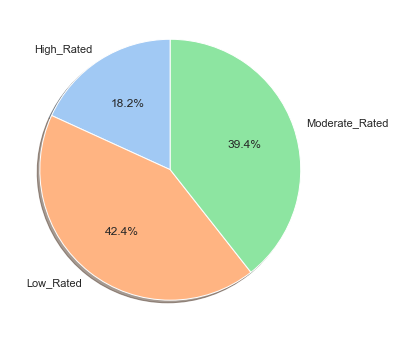

In [49]:
# Let's visualize the count of these differently rated restaurants.

# Prepare Data
unique_restaurants_by_category = merged_df.drop_duplicates(subset=["Restaurant"]).groupby("Rating_Category").size()\
                                .reset_index().rename(columns = {0: "Num_Restaurants"})

# Bar plot
multiple_subplots(["Rating_Category"], 1, 2, (15,6), "Restaurant Count and Proportion by Rating Category", "barplot", \
                  unique_restaurants_by_category, "Num_Restaurants")

# Pie Chart
plt.figure(figsize=(15,6))
colors = sns.color_palette('pastel')
plt.pie(unique_restaurants_by_category["Num_Restaurants"], labels=unique_restaurants_by_category["Rating_Category"],\
        autopct='%1.1f%%', startangle=90, shadow=True, colors=colors)

Observation: About 18% of total restaurants are High_Rated ones and about 40% are Moderate to Low Rated.

In [50]:
merged_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Number_of_Reviews,Number_of_Followers,Name,Cost,Cuisine_List,Rating_Category
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated


Now lets analyze the average cost for all restaurant categories.


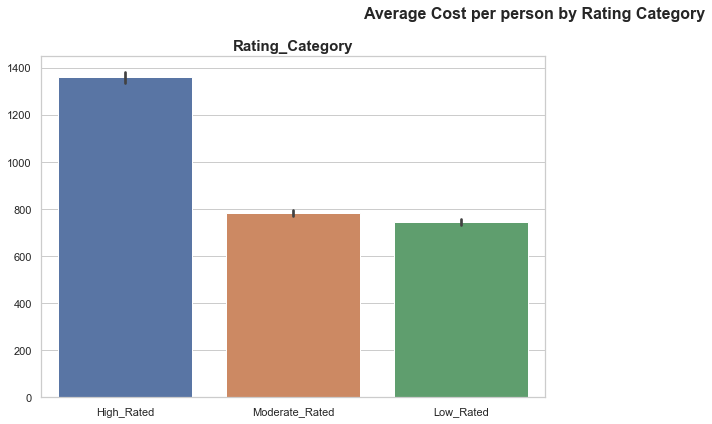

In [51]:
# Bar plot
multiple_subplots(["Rating_Category"], 1, 2, (15,6), "Average Cost per person by Rating Category", "barplot", merged_df, "Cost")

The Average Cost of dining per person is the highest in high rated restaurants while it is almost equal in moderate and low rated restaurants.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [52]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [53]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

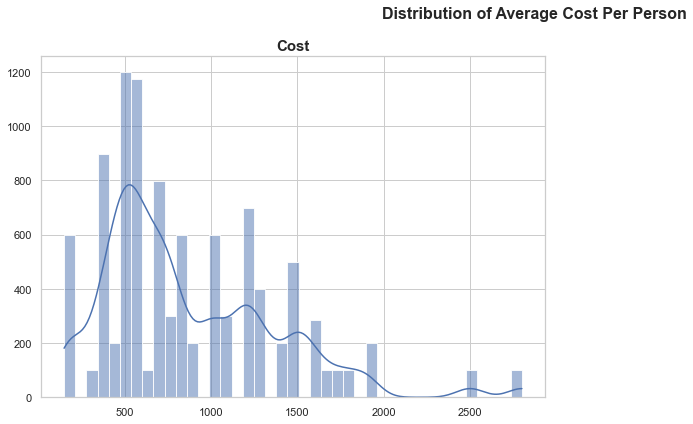

In [54]:
# Chart - 4 visualization code

# View distribution of Cost Data

# Bar plot
multiple_subplots(["Cost"], 1, 2, (15,6), "Distribution of Average Cost Per Person", "histplot", merged_df)

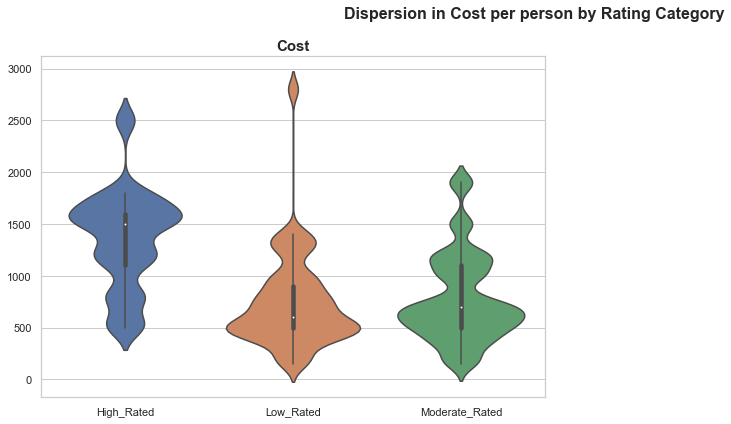

In [55]:
multiple_subplots(["Cost"], 1, 2, (15, 6), "Dispersion in Cost per person by Rating Category", "violinplot",\
                   merged_df, target=True, target_var="Rating_Category")

Insights:

* There are wide dispersion in cost per person for all the 3 rating categories. 
* The width of the violin indicates that for high-rated restaurants , cost is mostly in the range of 1500 to 1800, for moderate rated, it is 500 to 1100 and for low-rated, it is 500 to 800.
* There seem to be few ouliers in the cost data too.

In [56]:
merged_df["Cost"].describe()

count    9855.000000
mean      871.491629
std       506.033525
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64

Insights:
* The average cost of dining per person is 872 with a standard deviation of 506.
* The cost range is wide with a minimum of 150 and maximum of 2800.
* The highest frequency of customer spends is in the range of 500 to 600 indicating most customers dine at moderate to low rated restaurants which corroborates our initial analysis.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [57]:
def explode_feature_list(df, feature):
    
    '''
    This function explodes a feature containing lists of data into multiple rows for each list element.
    
    Args:
        df: A Pandas DataFrame Object.
        feature - str: The feature to be exploded.
        
    Returns:
        A DataFrame with the index reset and a Pandas Series with a new index that represents each row after exploding.
    '''
    
    # Reset index to ensure that its unique.
    df_reset = df.reset_index(drop=True)

    # Explode feature list to create multiple rows for each list element.
    explode = df_reset[feature].explode()
    
    return df_reset, explode

In [58]:
def horizontal_bar_chart(df, vertical_col, horizontal_col, figsize, title, x_label, y_label):
    
    '''
    This function plots a Horizontal Bar Chart.
    
    Args:
        df: A Pandas DataFrame Object.
        vertical_col - str: The categorical column to be plotted.
        horizontal_col - str: The numerical column to be plotted.
        figsize - tuple: A tuple of the figure dimensions.
        title - str: Title of the plot.
        xlabel - str: x-axis label.
        ylabel - str: y-axis label
        
    Returns:
        A Horizontal Bar Chart with the respective bar values sorted in descending order.
    '''
    
    # Define dimensions
    plt.figure(figsize=figsize)
    
    # Define colors
    color_palette = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue',\
                     'lightgoldenrodyellow', 'lightcyan', 'lightgray']
    
    # Create the Bar Chart
    bars = plt.barh(df[vertical_col], df[horizontal_col], color=color_palette)
    
    # Add labels to bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', ha='left', va='center', fontsize=12, color='black')

    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel(x_label, fontsize=14, fontweight="bold")
    plt.ylabel(y_label, fontsize=14, fontweight="bold")
    plt.gca().invert_yaxis()  # Invert the y-axis to display the highest median cost at the top
    plt.grid(False)
    
    # Display the plot
    plt.tight_layout()
    plt.show()
       

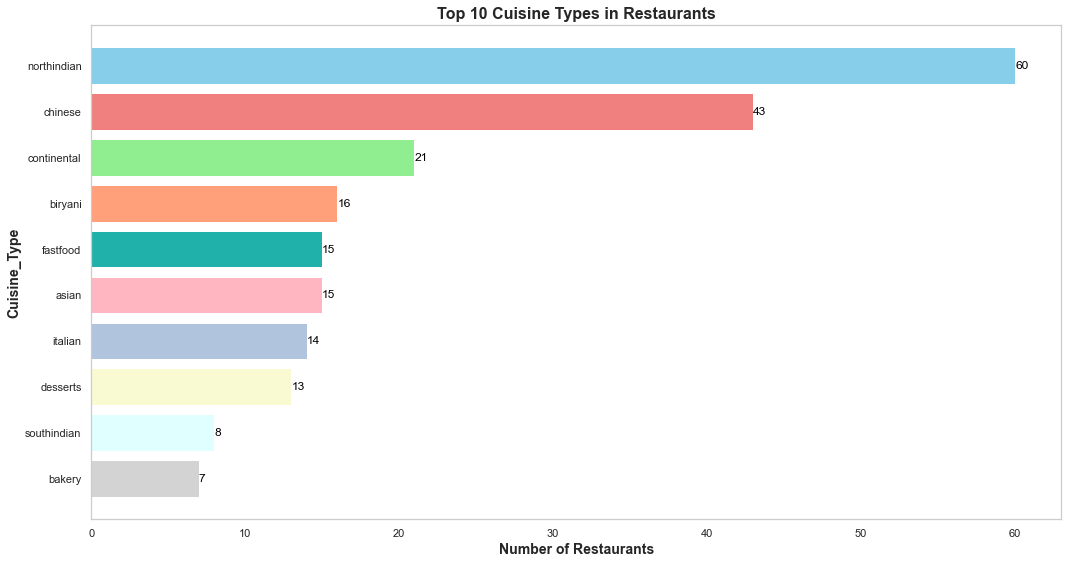

In [59]:
# Get the exploded Cuisines
restaurant_df_reset, exploded_cuisines = explode_feature_list(restaurant_df, "Cuisine_List")

# Create a DataFrame of the Count the occurrences of each cuisine type
cuisine_counts = exploded_cuisines.value_counts().reset_index().\
                rename(columns={"index": "Cuisine_Type", "Cuisine_List": "Number_of_Restaurants"})

# Choose the top N cuisine types to display on the y-axis
top_n = 10  # This value can be updated as per requirements.
cuisine_counts = cuisine_counts.head(top_n)

# Plot the horizontal bar chart
horizontal_bar_chart(cuisine_counts, "Cuisine_Type", "Number_of_Restaurants", (15, 8),\
                     f"Top {top_n} Cuisine Types in Restaurants", "Number of Restaurants", "Cuisine_Type")

Insights:

* The most common and popular cuisine seems to be "northindian" while "southindian" and "bakery" seem to be the least popular.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

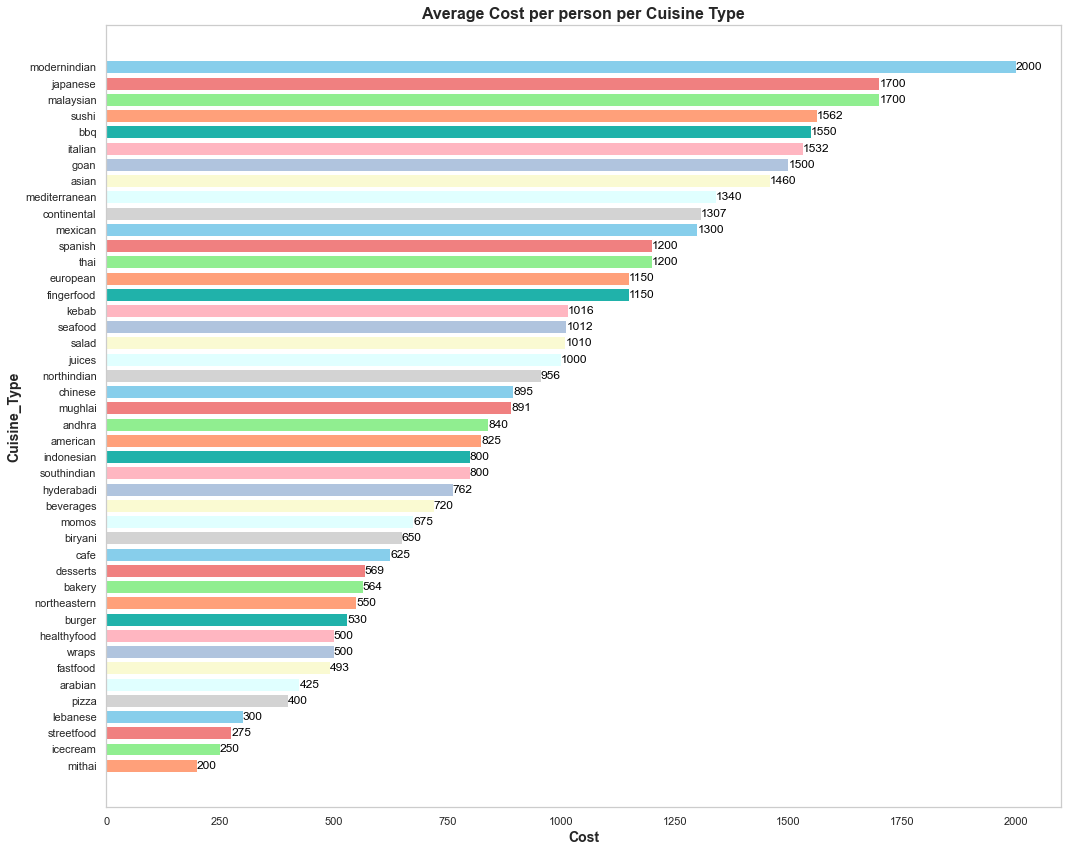

In [60]:
# Chart - 6 visualization code

# Create a DataFrame for each Cuisine Type and its respective Cost per person
cuisine_cost_df = pd.DataFrame({"Cuisine_Type": exploded_cuisines, "Cost": restaurant_df_reset["Cost"]})

# Create a DataFrame for average Cost per person per Cuisine
avg_cuisine_cost = cuisine_cost_df.groupby("Cuisine_Type")["Cost"].mean().sort_values(ascending=False).astype(int).reset_index()

# Plot the horizontal Bar Chart
horizontal_bar_chart(avg_cuisine_cost, "Cuisine_Type", "Cost", (15, 12), "Average Cost per person per Cuisine Type", \
                     "Cost", "Cuisine_Type")

The range of Average Cost per person for different Cuisine Types is quite wide from a minimum of 200 for mithai to a maximum of 2000 for mordernindian (about 10 times). 

Let's visualize the most expensive and least expensive cuisine types for a better focus on Cost-Cuisine Analysis. We'll consider the highest 10 and lowest 10 costly restaurants.

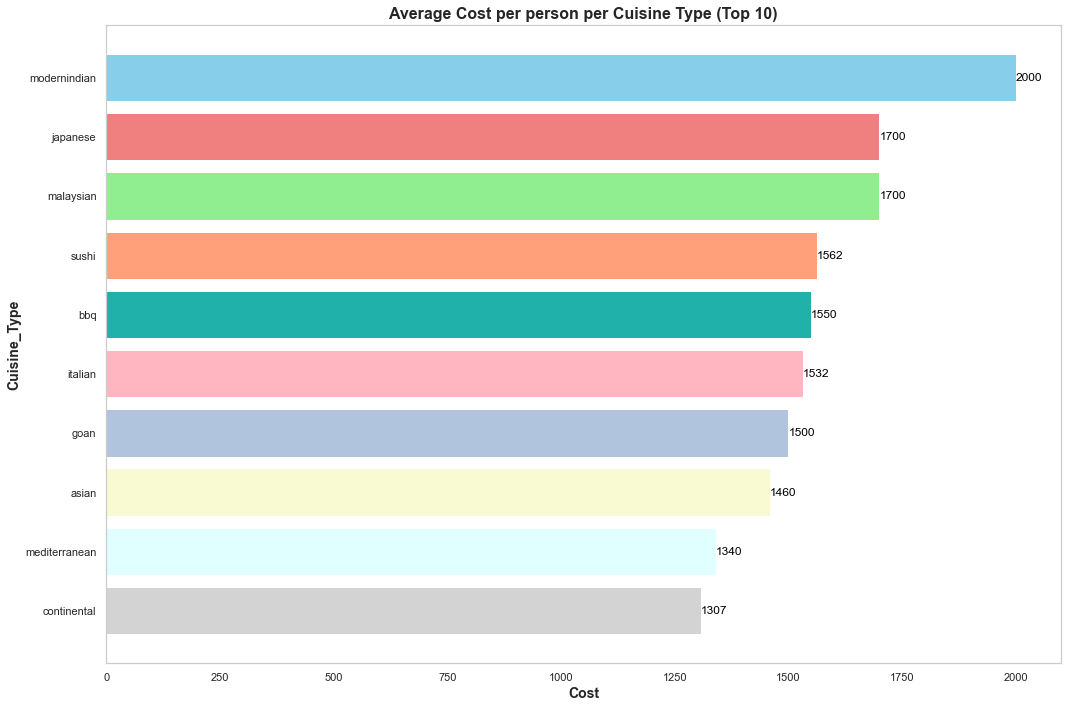

In [61]:
# Average Cost for Top N Cuisine types.
n = 10 # Can update this number as required.
cost_top_n = avg_cuisine_cost.head(n)

# Plot the horizontal Bar Chart
horizontal_bar_chart(cost_top_n, "Cuisine_Type", "Cost", (15, 10), f"Average Cost per person per Cuisine Type (Top {n})", \
                     "Cost", "Cuisine_Type")

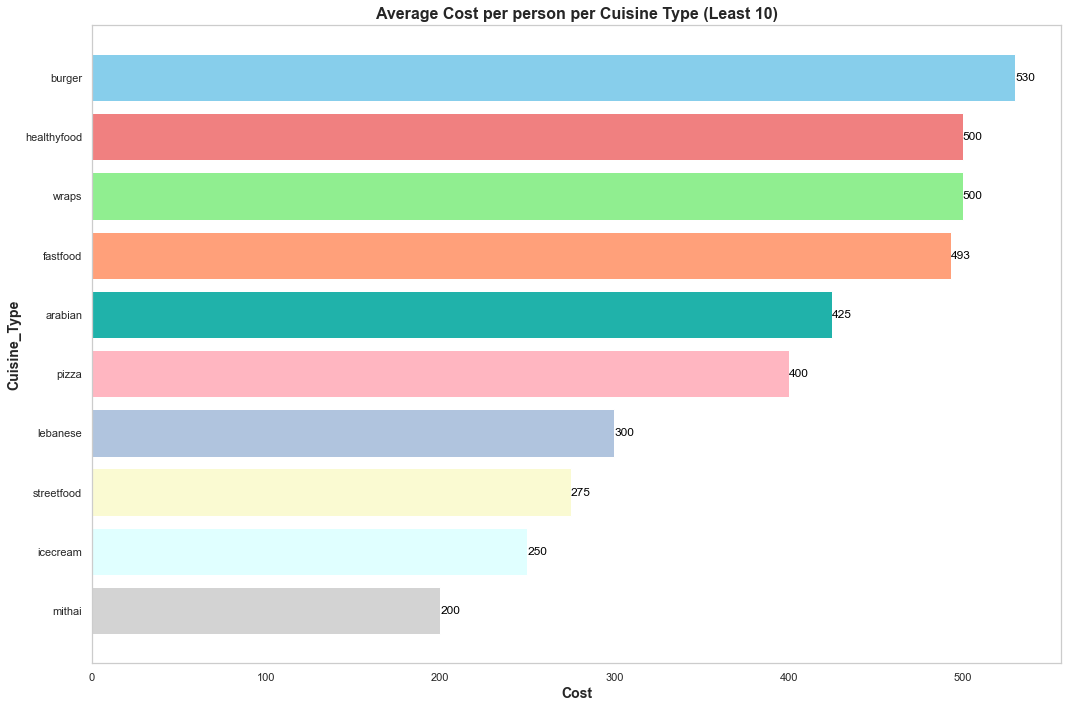

In [62]:
# Average Cost for Lowest N Cuisine types.
n = 10 # Can update this number as required.
cost_least_n = avg_cuisine_cost.tail(n)

# Plot the horizontal Bar Chart
horizontal_bar_chart(cost_least_n, "Cuisine_Type", "Cost", (15, 10), f"Average Cost per person per Cuisine Type (Least {n})", \
                     "Cost", "Cuisine_Type")

The Average Cost per person for the top 10 cuisines is in the range of 1300 to 2000 while for the lowest 10 cuisines, it is 200 to 550.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Figure size 1080x576 with 0 Axes>

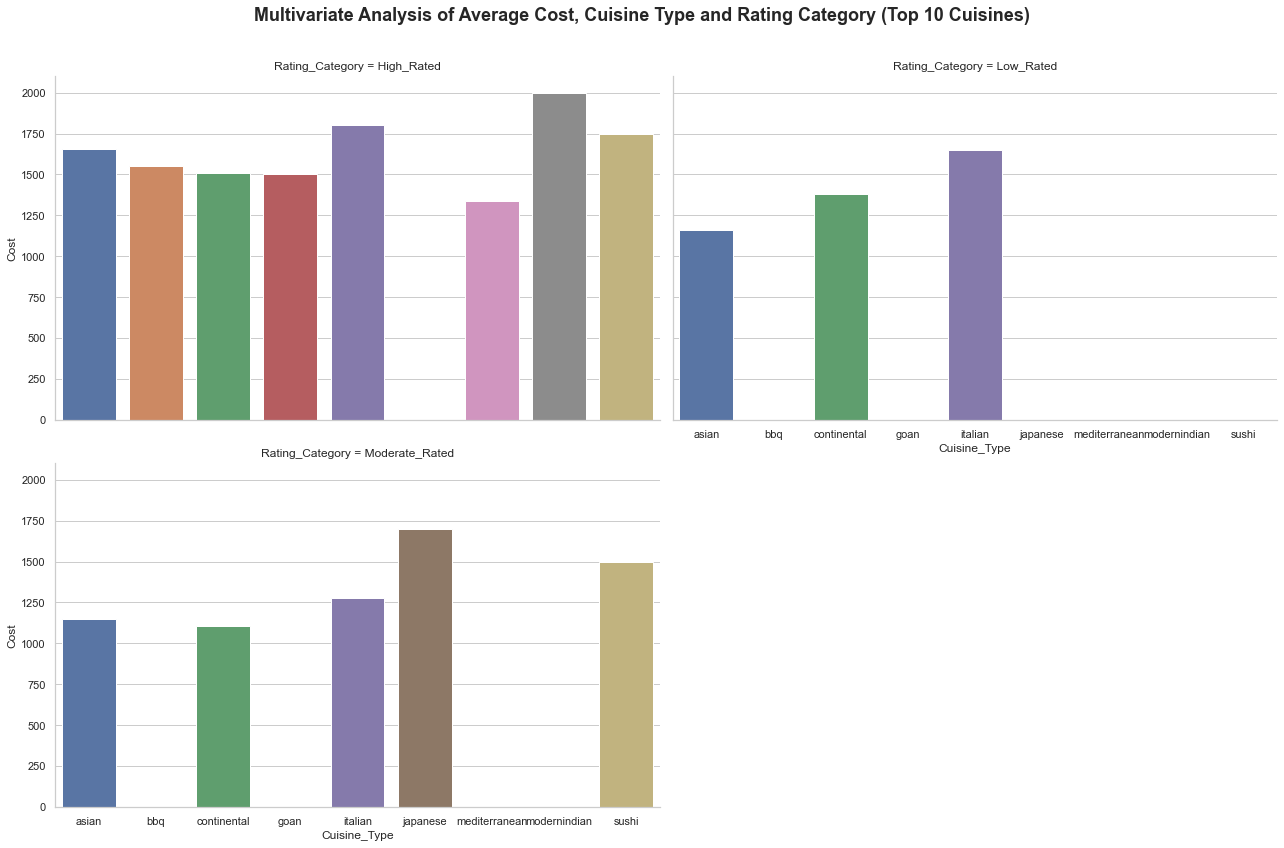

In [63]:
# Chart - 7 visualization code

# Get the exploded Cuisines
merged_df_reset, exploded_cuisines = explode_feature_list(merged_df, "Cuisine_List")

# Create DataFrame with for multivariate analysis of Cost, Rating and Cuisine Type.
cost_rating_cuisine = pd.DataFrame({"Cuisine_Type": exploded_cuisines, "Rating_Category": merged_df["Rating_Category"],\
                                   "Cost": merged_df["Cost"]})

# Analyze top 10 cuisine types.
top_10_cuisines = avg_cuisine_cost["Cuisine_Type"].head(10)
avg_cost_rating_cuisine = cost_rating_cuisine.groupby(["Cuisine_Type", "Rating_Category"])["Cost"].mean().astype(int).reset_index()
top_10 = avg_cost_rating_cuisine[avg_cost_rating_cuisine["Cuisine_Type"].isin(top_10_cuisines)]

# Create multiple subplots
show_fig_plot(top_10, "Cuisine_Type", (15, 8), "Rating_Category", "bar", 1.5, 2, \
              "Multivariate Analysis of Average Cost, Cuisine Type and Rating Category (Top 10 Cuisines)", \
              0.9, y_feature="Cost", height=6)

<Figure size 1080x576 with 0 Axes>

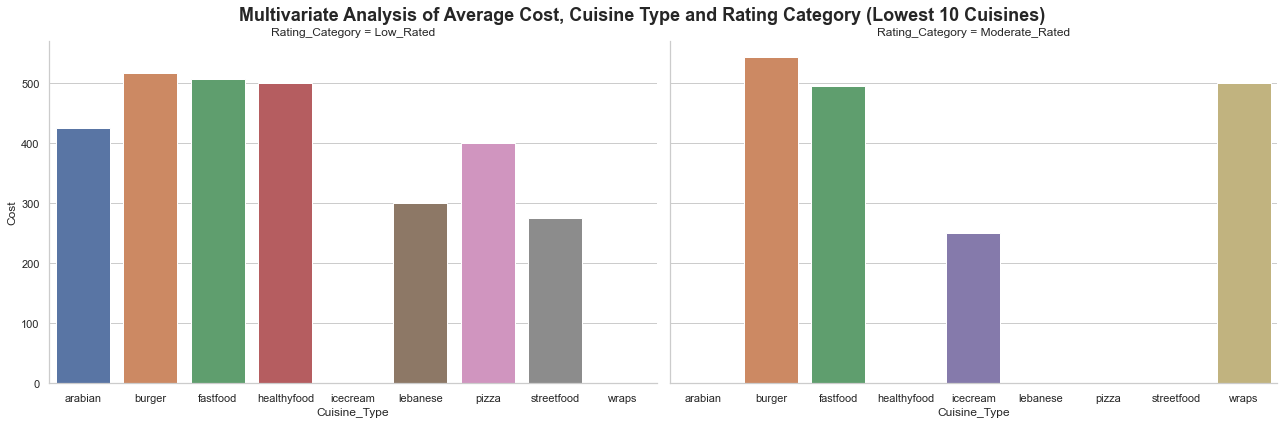

In [64]:
# Analyze lowest 10 cuisine types.
lowest_10_cuisines = avg_cuisine_cost["Cuisine_Type"].tail(10)
lowest_10 = avg_cost_rating_cuisine[avg_cost_rating_cuisine["Cuisine_Type"].isin(lowest_10_cuisines)]

# Create multiple subplots
show_fig_plot(lowest_10, "Cuisine_Type", (15, 8), "Rating_Category", "bar", 1.5, 2, \
              "Multivariate Analysis of Average Cost, Cuisine Type and Rating Category (Lowest 10 Cuisines)",\
              0.9, y_feature="Cost", height=6)

Insights:
* Most of the top 10 cuisine types are served or available in the high-rated restaurants with an average cost range of 1300 to 2000.
* Most of the lowest 10 cuisine types are served or available in the low-rated restaurants with an average cost range of 250 to 550.
* None of the lowest 10 cuisine types are served in the high-rated restaurants.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [65]:
# Chart - 8 visualization code

# Trend Analysis

# Prepare Data

# Extract month, day of the week and hour of the day.
merged_df["Month"] = merged_df["Time"].dt.month
merged_df["DayOfWeek"] = merged_df["Time"].dt.day_name()
merged_df["HourofDay"] = merged_df["Time"].dt.hour

# Seasonal Trend Analysis: Average Rating by Month
monthly_avg_rating = merged_df.groupby('Month')['Rating'].mean()

# Weekly Trend Analysis: Average Rating by Day of the Week
weekly_avg_rating = merged_df.groupby('DayOfWeek')['Rating'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Hourly Trend Analysis: Average Rating by Hour of the Day
hourly_avg_rating = merged_df.groupby('HourofDay')['Rating'].mean()

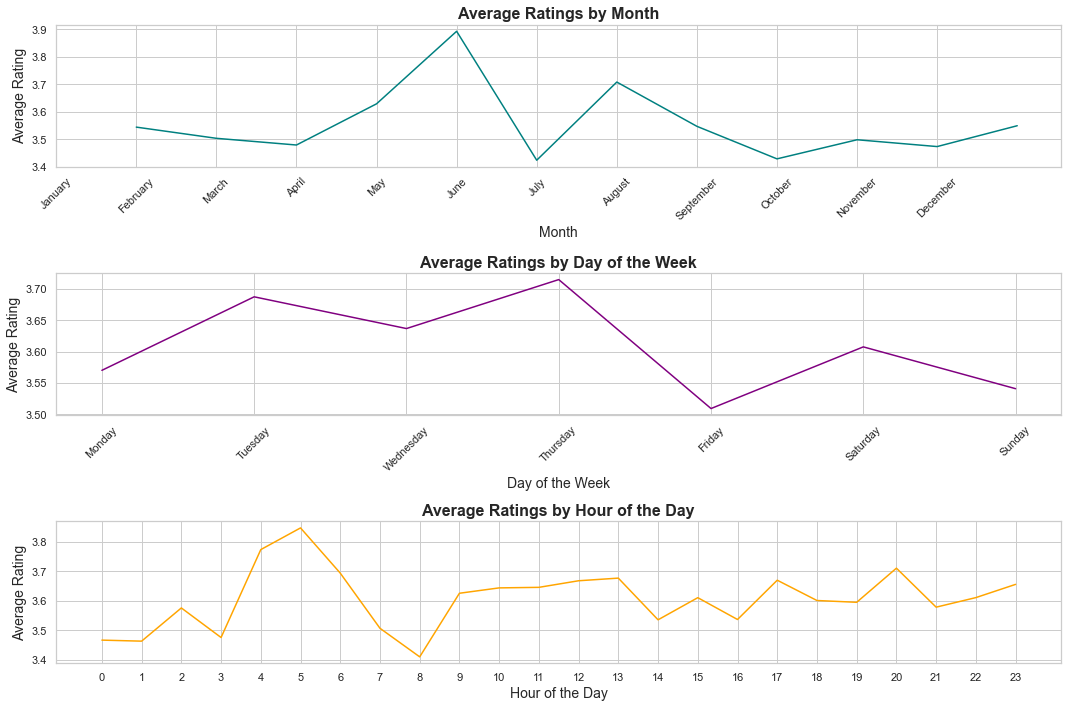

In [66]:
# Plotting all three trends in a single figure with 3 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Monthly Trend Plot
axes[0].plot(monthly_avg_rating, color='teal')
plot_labels("Month", "Average Rating", "Average Ratings by Month", axes, 0)
axes[0].set_xticks(range(0, 12))
axes[0].set_xticklabels([dt.date(2000, m, 1).strftime('%B') for m in range(1, 13)])
axes[0].tick_params(axis='x', rotation=45)

# Weekly Trend Plot
axes[1].plot(weekly_avg_rating, color='purple')
plot_labels("Day of the Week", "Average Rating", "Average Ratings by Day of the Week", axes, 1)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[1].tick_params(axis='x', rotation=45)

# Hourly Trend Plot
axes[2].plot(hourly_avg_rating, color='orange')
plot_labels("Hour of the Day", "Average Rating", "Average Ratings by Hour of the Day", axes, 2)
axes[2].set_xticks(range(0, 24))

# Show the plots
plt.tight_layout()
plt.show()

**Average Ratings by Month:**
* There is a noticeable peak in June, indicating the highest average ratings occur in this month.
* There are lower points, particularly noticeable in April and October, suggesting a potential seasonal impact on ratings.

**Average Ratings by Day of the Week:**
* Ratings peak mid-week, particularly on Thursday, and then there is a decline towards the weekend.
* The lowest average ratings occur on Friday.

**Average Ratings by Hour of the Day:**
* There are peaks in the early hours (around 5 AM), mid-morning (around 9 AM), and late evening (around 8 PM).
* There are noticeable dips in the late morning (around 7-8 AM) and early evening (around 2-4 PM).

In [67]:
merged_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Number_of_Reviews,Number_of_Followers,Name,Cost,Cuisine_List,Rating_Category,Month,DayOfWeek,HourofDay
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated,5,Saturday,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated,5,Saturday,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated,5,Friday,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated,5,Friday,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi...",High_Rated,5,Friday,21


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

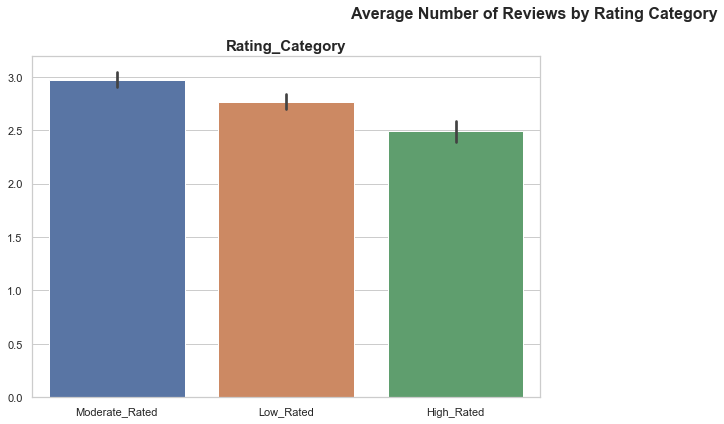

Text(0.5, 1.0, 'Proportion of Reviews per Rating Category')

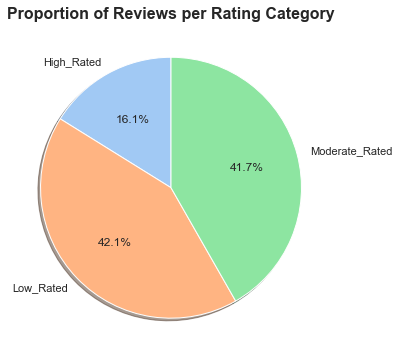

In [68]:
# Chart - 9 visualization code

# Let's analyze the number of reviews for different Rating Categories.

# Bar plot
multiple_subplots(["Rating_Category"], 1, 2, (15,6), "Average Number of Reviews by Rating Category", "barplot", \
                  merged_df, "Number_of_Reviews")

# Pie Chart
# Prepare Data
reviews_by_rating = merged_df.groupby("Rating_Category")["Number_of_Reviews"].sum()

# Plot
plt.figure(figsize=(15,6))
colors = sns.color_palette('pastel')
plt.pie(reviews_by_rating.values, labels=reviews_by_rating.index,\
        autopct='%1.1f%%', startangle=90, shadow=True, colors=colors)
plt.title("Proportion of Reviews per Rating Category", fontsize=16, fontweight="bold")

Insights:
* The average number of reviews is the lowest for high-rated restaurants and highest for moderate-rated restaurants.
* The proportion of total reviews is highest for low and moderate rated restaurants and least for high rated ones.

This could be because for high rated restaurants, generally everything from food, ambience to service would be good and people would just prefer a rating instead of writing a full review. Whereas, for moderate to low rated restaurants, customers prefer to clearly mention what was not good in those restaurants to justify their low ratings.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [69]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [70]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [71]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [72]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [73]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [74]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [75]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [76]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [77]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [78]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [79]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [222]:
# Creating a copy of the dataset for further feature engineering

# Create a MultiLabelBinarizer
mlb = MultiLabelBinarizer()
features = mlb.fit_transform(restaurant_df["Cuisine_List"])

In [223]:
# Create a DataFrame with the cuisine labels
features_df = pd.DataFrame(features, columns=mlb.classes_)
features_df.head()

,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,chinese,continental,desserts,european,fastfood,fingerfood,goan,healthyfood,hyderabadi,icecream,indonesian,italian,japanese,juices,kebab,lebanese,malaysian,mediterranean,mexican,mithai,modernindian,momos,mughlai,northeastern,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [255]:
# Add Restaurant Name and Cost Data.
features_df["Name"] = restaurant_df["Name"]
features_df["Cost"] = restaurant_df["Cost"]

# Calculate average rating and map it to restaurants.
avg_rating = review_df.groupby("Restaurant")["Rating"].mean()
features_df["Average_Rating"] = features_df["Name"].map(avg_rating)

# Set restaurant name as index.
features_df = features_df.set_index("Name")

# Display the first 5 rows.
features_df.head()

,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,chinese,continental,desserts,european,fastfood,fingerfood,goan,healthyfood,hyderabadi,icecream,indonesian,italian,japanese,juices,kebab,lebanese,malaysian,mediterranean,mexican,mithai,modernindian,momos,mughlai,northeastern,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Cost,Average_Rating
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,800.0,4.28
Paradise,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,800.0,4.70
Flechazo,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1300.0,4.66
Shah Ghouse Hotel & Restaurant,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,800.0,3.21
Over The Moon Brew Company,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1200.0,4.34


In [259]:
features_df[["Cost", "Average_Rating"]].isnull().sum()

Cost              1
Average_Rating    5
dtype: int64

There are few missing values in Cost and Average_Rating columns. Let's analyze those and decide whether to impute those values with some meaningful values or simply drop them.

In [261]:
# Display NaN records for Cost and Average_Rating.
nan = features_df[(features_df["Cost"].isna()) | (features_df["Average_Rating"].isna())]
nan

,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,chinese,continental,desserts,european,fastfood,fingerfood,goan,healthyfood,hyderabadi,icecream,indonesian,italian,japanese,juices,kebab,lebanese,malaysian,mediterranean,mexican,mithai,modernindian,momos,mughlai,northeastern,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Cost,Average_Rating
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN
IndiBlaze,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,600.0,NaN
Sweet Basket,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,200.0,NaN
Angaara Counts 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,500.0,NaN
Wich Please,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,250.0,NaN


Let's drop the restaurants with NaN values for Cost and Average_Rating as there is no Rating or Cost data available fot these.

In [275]:
# Drop the NaN restaurants
features_df = features_df.dropna()
features_df[["Cost", "Average_Rating"]].isnull().sum()

Cost              0
Average_Rating    0
dtype: int64

In [276]:
features_df.shape

(99, 46)

## ***Feature Selection***

There are a total of 44 cuisines in our feature set, features_df. To reduce dimensionality, we can select 90% of 44 cuisines implying that these cuisines are more popular and are offered by many restaurants.

Therefore, select features where cuisine count is > 4 (10% of 44 = 4). This will give us 90% of the most popular cuisines.

In [284]:
# Select only the cuisines that occur more than once
selected_features = features_df.columns[features_df.sum(axis=0) > 4].tolist()
print(f"Selected Features: \n{selected_features}\n")
print(f"Total Number of Selected Features: {len(selected_features)}")

Selected Features: 
['american', 'andhra', 'asian', 'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese', 'continental', 'desserts', 'fastfood', 'italian', 'kebab', 'mediterranean', 'mughlai', 'northindian', 'salad', 'southindian', 'Cost', 'Average_Rating']

Total Number of Selected Features: 21


## ***Clustering Analysis***

In [289]:
print(f"Selected Features: \n{selected_features}")

Selected Features: 
['american', 'andhra', 'asian', 'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese', 'continental', 'desserts', 'fastfood', 'italian', 'kebab', 'mediterranean', 'mughlai', 'northindian', 'salad', 'southindian', 'Cost', 'Average_Rating']


We'll use two methods to find the optimal number of clusters:
1. K-Means Clustering
2. Agglomerative Heirarchical Clustering

**K-Means Clustering**

In [290]:
# Create a dataset with selected features to be used for clustering.
X = features_df[selected_features]

# Scale the data using StandardScaler()
X_scaled = StandardScaler().fit_transform(X)

In [292]:
type(X_scaled)

numpy.ndarray

In [306]:
def perform_kmeans_and_metrics(data, min_cluster, max_cluster, init="k-means++"):
    
    '''
    This function perfors K-Means Clustering using the given cluster range, calculates and returns the inertia values and\
    silhouette scores for each cluster.
    
    Args:
        data: An numpy ndarray to perform clustering on.
        min_cluster - int: Minimum number of clusters to be formed.
        max_cluster - int: Maximum number of clusters to be formed.
        init - str: Method for initializing the centroids (cluster centers) before clustering. Default is 'k-means++'
        
    Returns:
        inertia_values - list: List of inertia values for each cluster.
    '''
    
    # Initialize lists to store the inertia (within-cluster sum of squares) and silhouette scores
    inertia_values = {}
    silhouette_scores = {}
    
    # Perform K-means clustering for each cluster number in the range
    for n in range(min_cluster, max_cluster+1):
        kmeans = KMeans(n_clusters=n ,init=init, random_state=42)
        kmeans.fit(data)
        
        # Calculate the inertia and silhouette score for this cluster number
        inertia_values[n] = round(kmeans.inertia_, 4)
        silhouette_scores[n] = round(silhouette_score(data, kmeans.labels_), 4)
        
    return inertia_values, silhouette_scores
    

In [307]:
inertia_values, silhouette_scores = perform_kmeans_and_metrics(X_scaled, 2, 15, init="k-means++")
print(f"Inertia Values: \n{inertia_values}\n")
print(f"Silhouette Scores: \n{silhouette_scores}")

Inertia Values: 
{2: 1869.4185, 3: 1746.4142, 4: 1642.0374, 5: 1562.817, 6: 1463.564, 7: 1318.3897, 8: 1252.1431, 9: 1178.0792, 10: 1095.6445, 11: 1026.5151, 12: 933.862, 13: 846.3413, 14: 807.147, 15: 765.1401}

Silhouette Scores: 
{2: 0.1794, 3: 0.1943, 4: 0.1398, 5: 0.114, 6: 0.132, 7: 0.1566, 8: 0.1172, 9: 0.1174, 10: 0.1346, 11: 0.1496, 12: 0.1695, 13: 0.191, 14: 0.1979, 15: 0.2041}


In [309]:
inertia_values.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

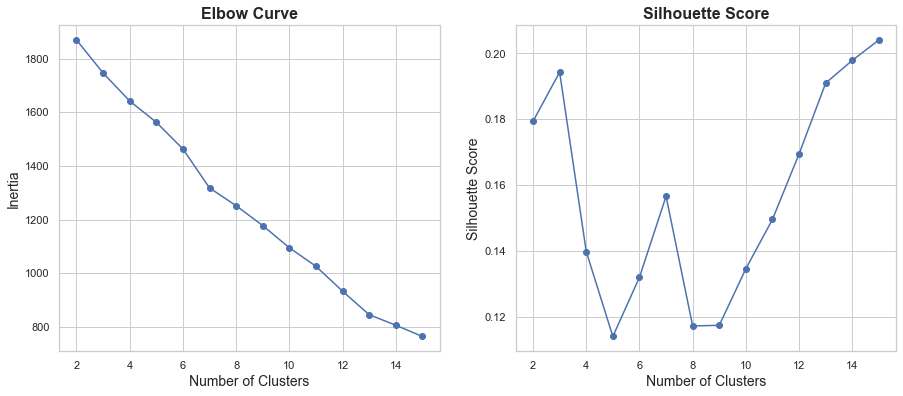

In [316]:
# Visualize the inertia values and score to find optimal number of clusters.

# Set figure dimensions
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Plot an elbow curve to find the optimal number of clusters.
axes[0].plot(inertia_values.keys(), inertia_values.values(), marker="o")
plot_labels("Number of Clusters", "Inertia", "Elbow Curve", axes, 0)

# Plot the silhouette score plot to analyze cluster quality.
axes[1].plot(silhouette_scores.keys(), silhouette_scores.values(), marker="o")
plot_labels("Number of Clusters", "Silhouette Score", "Silhouette Score", axes, 1)


**Observation:**  
* The silhouette score for 3 and 13 clusters is almost equal but the inertia values are quite different with 3 clusters being much higher than 13 clusters.
* We could select 13 clusters but to reach a middle ground, let's select 7 clusters. Why? Because from the elbow curve we see that after 7 clusters, the decrease in inertia is less steep and from the silhouette score plot, we see that 7 clusters seem to  have fairly positive score relative to the extreme values.

Now, let's verify and/or update our optimal cluster value after experimenting with Agglomerative Heirarchical Clustering.

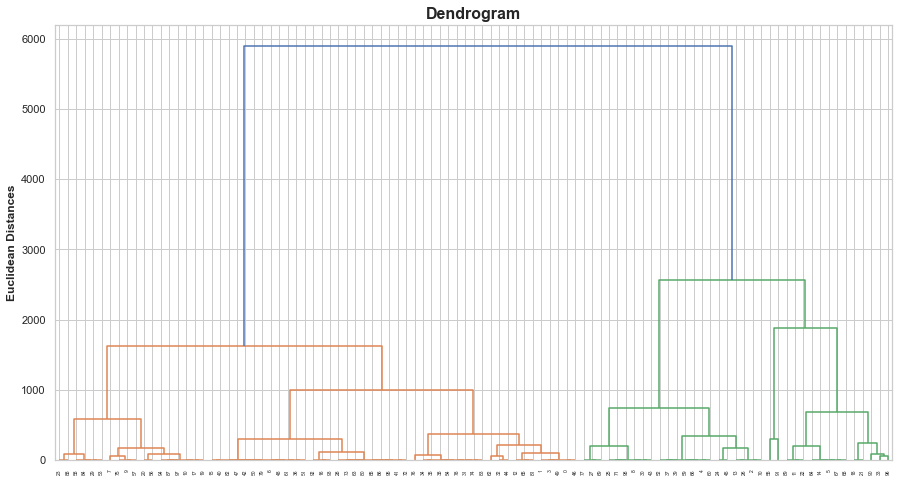

In [322]:
plt.figure(figsize=(15, 8))


clusters = sch.linkage(X, method = 'ward', metric="euclidean")
dendrogram = sch.dendrogram(clusters)
plt.title('Dendrogram', fontsize=16, fontweight="bold")
# plt.xlabel('Customers')
plt.ylabel('Euclidean Distances', fontweight="bold")
# plt.axhline(y=11.5, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [319]:
X_scaled

array([[-0.25400025, -0.2306328 , -0.40583972, ...,  3.37268439,
        -0.14175243,  1.33108502],
       [-0.25400025, -0.2306328 , -0.40583972, ..., -0.29649973,
        -0.14175243,  2.15899426],
       [-0.25400025, -0.2306328 ,  2.4640269 , ..., -0.29649973,
         0.84652157,  2.08014576],
       ...,
       [-0.25400025, -0.2306328 , -0.40583972, ..., -0.29649973,
         1.73596818,  1.66619114],
       [-0.25400025, -0.2306328 , -0.40583972, ..., -0.29649973,
        -0.93237164, -0.10790007],
       [-0.25400025, -0.2306328 , -0.40583972, ..., -0.29649973,
         0.25355717,  0.27648636]])

In [218]:
x = pd.DataFrame({'A': [1,2,3,4], 'B': [['Cat1'], ['Cat1', 'Cat2'], ['Cat2', 'Cat3'], ['Cat4']]})
x

,A,B
0,1,[Cat1]
1,2,"[Cat1, Cat2]"
2,3,"[Cat2, Cat3]"
3,4,[Cat4]


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

## Sentiment Analysis

Sentiment polarity analysis, often simply referred to as sentiment analysis, is a natural language processing (NLP) technique used to determine the sentiment expressed in a piece of text. Sentiment polarity analysis works by analyzing the text to assess the degree of positivity, negativity, or neutrality conveyed in the text.

TextBlob is a library that provides a simplified interface for performing natural language processing (NLP) tasks, including sentiment analysis as it automates many of the steps involved in sentiment polarity analysis.

In [81]:
def clean_text(text):
    '''
    This function takes a string as input and uses regex to identify patterns and returns a clean string.
    
    Args:
        text - str: Input text to be cleaned.
        
    Returns:
        A cleaned text string.
    '''
    
    cleaned_text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|\d+", "", text.lower())
    
    return cleaned_text

In [82]:
review_df["Cleaned_Review"] = review_df["Review"].apply(clean_text)

In [83]:
review_df["Cleaned_Review"].head()

0    the ambience was good food was quite good  had...
1    ambience is too good for a pleasant evening se...
2    a must try great food great ambience thnx for ...
3    soumen das and arun was a great guy only becau...
4    food is goodwe ordered kodi drumsticks and bas...
Name: Cleaned_Review, dtype: object

**Calculate Sentiment Polarity using TextBlob**

In [84]:
# Applying sentiment polarity to get sentiment scores using TextBlob.
review_df["Sentiment_Score"] = review_df["Cleaned_Review"].apply(lambda x: TextBlob(x).sentiment.polarity) 

# Classifying sentiments as positive, negative or neutral.
review_df["Sentiment_Type"] = review_df["Sentiment_Score"].apply(lambda x: "Positive" if x > 0 else \
                                                                 "Negative" if x < 0 else "Neutral")

# Display the first 5 rows with the sentiment analysis.
review_df[["Cleaned_Review", "Sentiment_Score", "Sentiment_Type"]].head()

,Cleaned_Review,Sentiment_Score,Sentiment_Type
0,the ambience was good food was quite good had...,0.660000,Positive
1,ambience is too good for a pleasant evening se...,0.606667,Positive
2,a must try great food great ambience thnx for ...,0.550000,Positive
3,soumen das and arun was a great guy only becau...,0.500000,Positive
4,food is goodwe ordered kodi drumsticks and bas...,0.577500,Positive


**Extract Noun from each Review for further analysis**

In [166]:
# Load the spacy model
nlp = spacy.load("en_core_web_sm")
    
def extract_noun_from_text(string):
    
    '''
    This function is used to extract noun entities from textual data using spacy library.
    
    Args:
        text - str: Input text string to extract nouns from.
        
    Returns:
        A list of extracted nouns from the input text string.
    '''
    
    # Check if the input string is Nan, if it is return an empty list.
    if pd.isna(string):
        return []
    
    doc = nlp(string)
    # Extract noun from text
    extracted_nouns = [token.text for token in doc if token.pos_ == "NOUN"]
    
    return extracted_nouns

In [167]:
# Apply extract_noun_from_text function to each review text string.

start_time = time.time()

review_df["Review_Entities"] = review_df["Cleaned_Review"].apply(extract_noun_from_text)

stop_time = time.time()

print(f"Elapsed Time: {time.strftime('%H:%M:%S', time.gmtime(stop_time - start_time))}")

# Display first 5 rows after noun extraction.
review_df[["Cleaned_Review", "Review_Entities"]].head()

Elapsed Time: 00:01:49


,Cleaned_Review,Review_Entities
0,the ambience was good food was quite good had...,"[ambience, food, lunch, cost, place, sate, bru..."
1,ambience is too good for a pleasant evening se...,"[ambience, evening, service, food, experience,..."
2,a must try great food great ambience thnx for ...,"[food, ambience, thnx, service, pradeep, recom..."
3,soumen das and arun was a great guy only becau...,"[arun, guy, behavior, sincerety, food, course,..."
4,food is goodwe ordered kodi drumsticks and bas...,"[food, drumsticks, basket, mutton, biryani, th..."


**Calculating Cumulative Sentiment Score for each Entity**

In [183]:
from collections import defaultdict

# Initialize dictionaries to hold the sum of values of sentiments for each food item
sentiment_counts = defaultdict(lambda: {'Positive': 0, 'Negative': 0, 'Neutral': 0})

# Iterate over each review row
for index, row in review_df.iterrows():
    sentiment = row["Sentiment_Type"]
    sentiment_score = row["Sentiment_Score"]
    for item in row["Review_Entities"]:
        sentiment_counts[item][sentiment] += sentiment_score

# Display cumulative sentiment score for each review entity.
sentiment_counts_df = pd.DataFrame.from_dict(sentiment_counts, orient="index")
sentiment_counts_df

,Positive,Negative,Neutral
ambience,576.202063,-17.811802,0.0
food,1728.252658,-250.403071,0.0
lunch,133.341863,-14.057486,0.0
cost,25.226397,-2.545169,0.0
place,1684.695765,-110.149886,0.0
...,...,...,...
segregation,0.107800,0.000000,0.0
husbandthe,0.470000,0.000000,0.0
carvings,0.470000,0.000000,0.0
disappointthis,0.470000,0.000000,0.0


**Visualize the Results**

In [198]:
# Plot the respective postive and negative sentiment scores for each attributes using the positive threshold.

def show_dual_axis_bar_line_plot(df, ax1_col, ax2_col, xlabel, ax1_ylabel, ax2_ylabel, title, xticklabels, ax2_negative=False):
    
    '''
    This function plots a dual axis bar and line plot.
    
    Args:
        df: A Pandas DataFrame Object.
        ax1_col - str: Column to be plotted on the primary axis.
        ax2_col - str: Column to be plotted on the secondary axis.
        xlabel - str: X-axis label.
        ax1_ylabel - str: Y-axis label for the primary axis.
        ax2_ylabel - str: Y-axis label for the secondary axis.
        title - str: Title of the plot.
        xticklabels: X-tick labels to be plotted on the x-axis.
        ax2_negative - bool: Whether secondary axis has negative values, default=False.
        
    Returns:
        A dual axis bar + line plot with the bar plot on the primary axis and line plot on the secondary axis.        
    '''
    
    # Set figure dimensions
    fig, axes = plt.subplots(figsize=(15, 6))

    # Bar plot for positive values
    df[ax1_col].plot(kind="bar", ax=axes, color="green")

    # Line plot for negative values
    axes2 = axes.twinx()
    (df[ax2_col]*(-1 if ax2_negative else 1)).plot(kind="line", ax=axes2, color="red", marker="o", linewidth=2, label=ax2_col)

    # Labels and Legend
    axes.set_xlabel(xlabel, fontweight="bold")
    axes.set_ylabel(ax1_ylabel, fontweight="bold")
    axes2.set_ylabel(ax2_ylabel, fontweight="bold")
    axes.set_title(title, fontsize=16, fontweight="bold")
    fig.legend(loc="upper right", bbox_to_anchor=(1.1, 1))
    axes.set_xticklabels(xticklabels, rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

**Top 20 Positive Sentiments w.r.t. each Entity**

In [199]:
# Create a threshold to categorize sentiments as highly positive and then analyze attributes that led to the high positivity.
pos_threshold = sentiment_counts_df["Positive"].sort_values(ascending=False)[19]

# Filter the DataFrame using the threshold.
top_positive_sentiments_df = sentiment_counts_df[sentiment_counts_df["Positive"] > pos_threshold].\
                            sort_values(by="Positive", ascending=False)


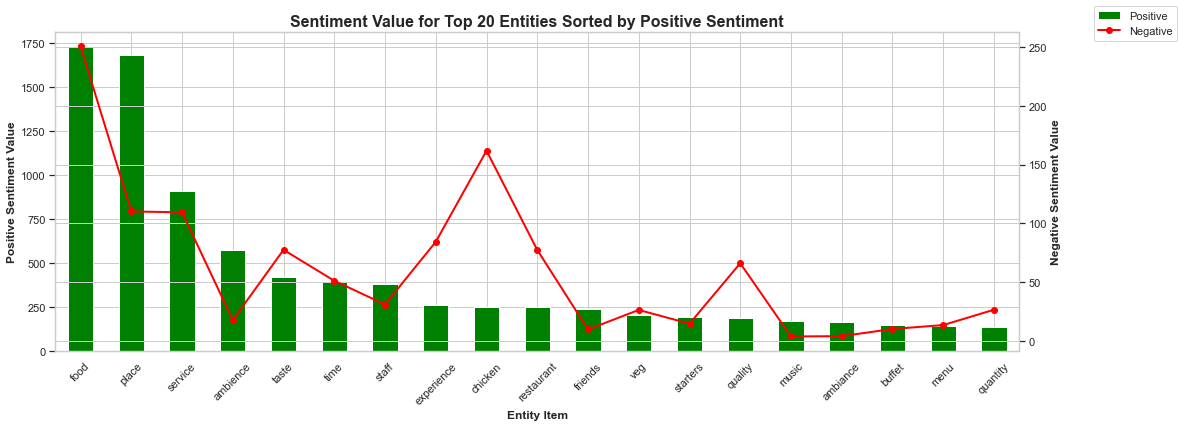

In [200]:
# Plot the top 20 positive sentiment values w.r.t each attribute.

show_dual_axis_bar_line_plot(top_positive_sentiments_df, "Positive", "Negative", "Entity Item", "Positive Sentiment Value",\
                             "Negative Sentiment Value", "Sentiment Value for Top 20 Entities Sorted by Positive Sentiment",\
                            top_positive_sentiments_df.index, ax2_negative=True)

**Insights from the Positive Sentiments Chart:**

* **Food and Place - Major Drivers:** The entities 'food' and 'place' has the highest mentions by a significant margin.

* **Service Matters:** 'Service' is another entity with a high positive sentiment value, showing it's an important factor for customers.

* **Negative Sentiments:** Even for entities with high positive sentiment values, there are corresponding negative sentiments, as indicated by the line graph. This suggests that while an aspect might be generally well-received, there are still notable areas of dissatisfaction.

* **Consistent Positive Aspects:** Entities such as 'place', 'service' and 'ambience' have strong positive sentiment values, suggesting that these are consistently positive aspects of the restaurants included in this analysis.

* **Specific Food Items:** The chart separates 'chicken' and 'veg' indicates varying degrees of sentiment, which could reflect the quality or preference of these food items.

* **Quality Over Quantity:** 'Quality' has a higher positive sentiment compared to 'quantity', suggesting that customers value the quality of their meal more than the amount.

* **Less Impactful Entities:** Entities like 'music', 'buffet', 'menu', and 'quantity' have lower positive sentiment values, suggesting they are less impactful on overall customer satisfaction.

**Business Impact:**

The chart can help restaurants understand what aspects are most valued by customers and which aspects lead to customer dissatisfaction, allowing them to focus on maintaining high standards and address customer issues in the respective areas.


**Top 20 Negative Sentiments w.r.t. each Entity**

In [201]:
# Create a threshold to categorize sentiments as highly negative and then analyze attributes that led to the high negativity.
neg_threshold = sentiment_counts_df["Negative"].sort_values(ascending=True)[19]

# Filter the DataFrame using the threshold.
top_negative_sentiments_df = sentiment_counts_df[sentiment_counts_df["Negative"] < neg_threshold].\
                            sort_values(by="Negative", ascending=True)


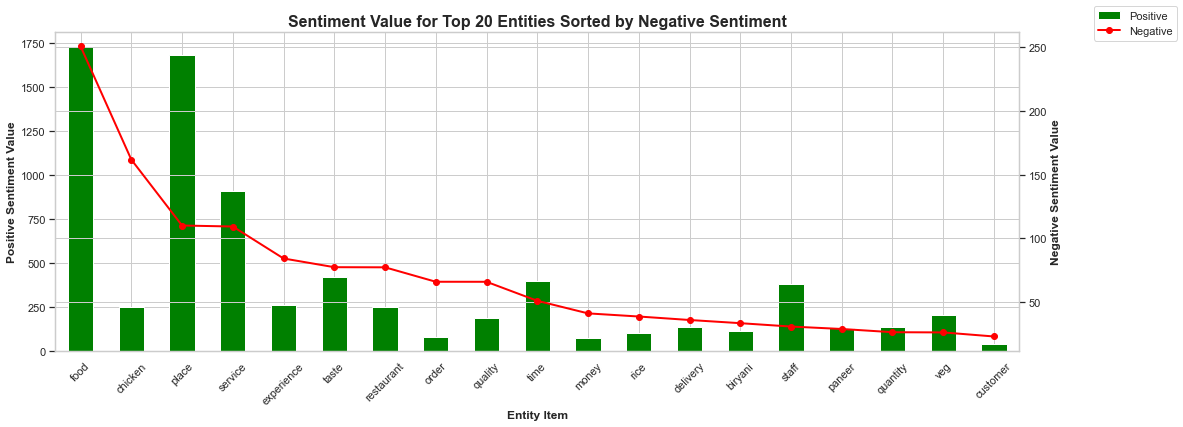

In [202]:
# Plot the top 20 negative sentiment values w.r.t each attribute.

show_dual_axis_bar_line_plot(top_negative_sentiments_df, "Positive", "Negative", "Entity Item", "Positive Sentiment Value",\
                             "Negative Sentiment Value", "Sentiment Value for Top 20 Entities Sorted by Negative Sentiment",\
                            top_negative_sentiments_df.index, ax2_negative=True)

**Insights from Negative Sentiments Chart**

* **Food** - Major Drivers: Food has highest positive and negative sentiment values, suggesting that it is the key driver of satisfaction.

* **Specific Food Items:** Chicken has a relatively high negative sentiment compared to its positive score. This suggests that chicken dishes are crucial to get right, as they can significantly impact customer sentiment.

* **Place and Service:** Place and Service have a high positive sentiment, but also a notable negative sentiment. Consistent service quality and a clean and hygienic place could be a determining factor in overall customer satisfaction.

* **Experience and Taste:** These areas have a higher negative sentiment compared to its positive score. This indicates that while good experiences and taste are praised sometimes, the bad ones leave a strong negative impression on customers.

* **Value for Money:** Money has a higher negative sentiment compared to its positive score, which suggests that the perception of value for money is a concern for customers.

* **Operational Aspects:** The negative sentiments for 'order', 'delivery', and 'time' are lower than for 'food', 'chicken', and 'place', but are still significant. This could indicate that operational efficiency in order processing and delivery is an area for improvement.

* **Staff Interaction:** Staff have higher positive sentiment and comparatively lower negative sentiment. This suggests that good staff interactions can greatly enhance the customer experience, but poor interactions have less impact on negative sentiment compared to food quality or place.

**Business Impact:**

* The data can guide targeted improvements in areas that significantly affect customer sentiment, like food quality and ambience.
* Understanding that quality is more important than speed could lead to prioritizing cooking quality over rapid service, improving overall satisfaction.
* Since value for money is a concern, restaurants could review pricing strategies to better align with customer expectations.
* Overlooking the importance of the chicken dishes and experience could disproportionately impact the business negatively due to their high negative sentiments relative to their positive values.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [86]:
# Expand Contraction

#### 2. Lower Casing

In [87]:
# Lower Casing

#### 3. Removing Punctuations

In [88]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [89]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [90]:
# Remove Stopwords

In [91]:
# Remove White spaces

#### 6. Rephrase Text

In [92]:
# Rephrase Text

#### 7. Tokenization

In [93]:
# Tokenization

#### 8. Text Normalization

In [94]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [95]:
# POS Taging

#### 10. Text Vectorization

In [96]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [97]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [98]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [99]:
# Transform Your data

### 6. Data Scaling

In [100]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [101]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [102]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [103]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [104]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [105]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [106]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [107]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [108]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [109]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [110]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [111]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [112]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [113]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***